# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# Import metrics from the SciPy library
from scipy import stats

from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather =  requests.get(city_url).json()
        

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
             
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mazatlan
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | happy valley-goose bay
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | olyokminsk
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | pancas
Processing Record 11 of Set 1 | nar'yan-mar
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | bhimunipatnam
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | prado
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | wamba
P

In [4]:
city_weather =  requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': 39.4667, 'lon': 141.95},
 'dt': 1697850546,
 'id': 2110560,
 'main': {'feels_like': 12.98,
          'grnd_level': 1007,
          'humidity': 53,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 14.13,
          'temp_max': 14.13,
          'temp_min': 14.13},
 'name': 'Yamada',
 'sys': {'country': 'JP', 'sunrise': 1697834837, 'sunset': 1697874378},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 262, 'gust': 3.64, 'speed': 1.21}}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df = pd.DataFrame(city_data, columns=["City", 
                                                "Lat",
                                                 "Lng",
                                                 "Max Temp", 
                                                 "Humidity", 
                                                 "Cloudiness", 
                                                 "Wind Speed", 
                                                 "Country", 
                                                 "Date"])

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mazatlan,23.2167,-106.4167,30.51,82,100,1.34,MX,1697850435
1,thompson,55.7435,-97.8558,7.09,100,100,2.57,CA,1697850503
2,san antonio de pale,-1.4014,5.6325,25.81,83,99,4.05,GQ,1697850503
3,grytviken,-54.2811,-36.5092,2.22,95,100,1.52,GS,1697850503
4,happy valley-goose bay,53.3168,-60.3315,7.92,93,100,0.41,CA,1697850503


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mazatlan,23.2167,-106.4167,30.51,82,100,1.34,MX,1697850435
1,thompson,55.7435,-97.8558,7.09,100,100,2.57,CA,1697850503
2,san antonio de pale,-1.4014,5.6325,25.81,83,99,4.05,GQ,1697850503
3,grytviken,-54.2811,-36.5092,2.22,95,100,1.52,GS,1697850503
4,happy valley-goose bay,53.3168,-60.3315,7.92,93,100,0.41,CA,1697850503


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

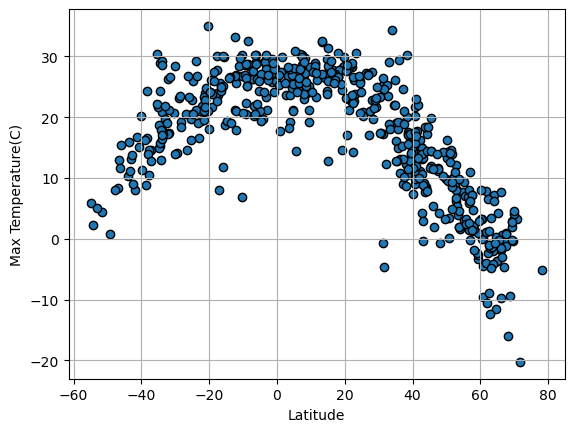

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

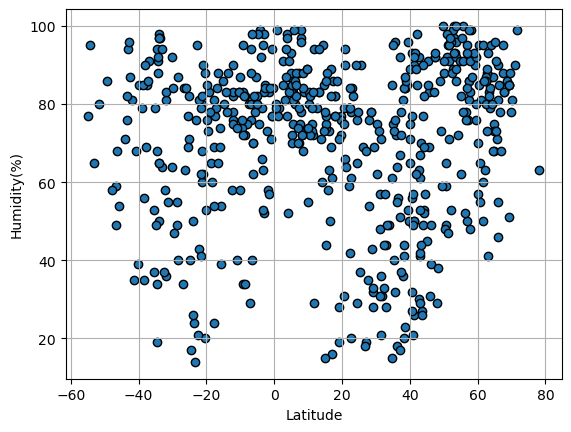

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.grid()


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

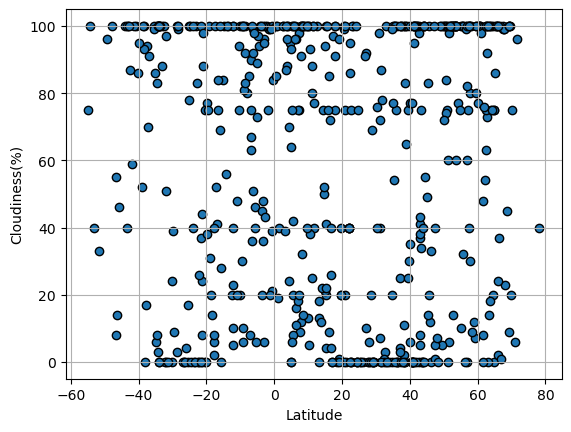

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values,edgecolors="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

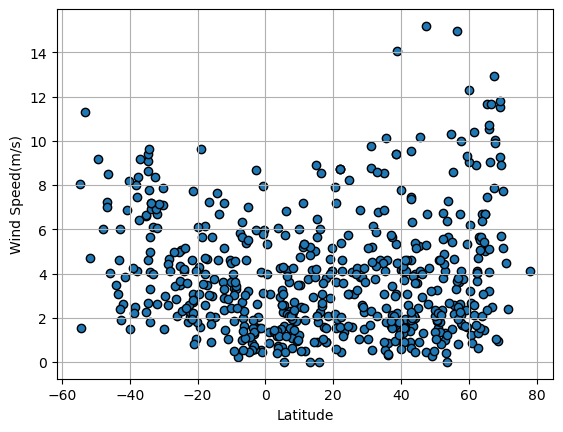

In [12]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties

plt.scatter(x_values,y_values,edgecolors="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title
    plt.title(title)
    
    # Print r value
    print(f"The r-value is: {r_value**2}")
    
    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mazatlan,23.2167,-106.4167,30.51,82,100,1.34,MX,1697850435
1,thompson,55.7435,-97.8558,7.09,100,100,2.57,CA,1697850503
4,happy valley-goose bay,53.3168,-60.3315,7.92,93,100,0.41,CA,1697850503
6,olyokminsk,60.3736,120.4264,3.27,95,100,6.19,RU,1697850503
10,nar'yan-mar,67.6713,53.0870,0.97,83,99,10.02,RU,1697850504


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san antonio de pale,-1.4014,5.6325,25.81,83,99,4.05,GQ,1697850503
3,grytviken,-54.2811,-36.5092,2.22,95,100,1.52,GS,1697850503
5,waitangi,-43.9535,-176.5597,10.38,71,100,3.46,NZ,1697850260
7,ancud,-41.8697,-73.8203,8.05,81,59,2.62,CL,1697850503
8,port-aux-francais,-49.3500,70.2167,0.82,86,96,9.18,TF,1697850503


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.769354968660302


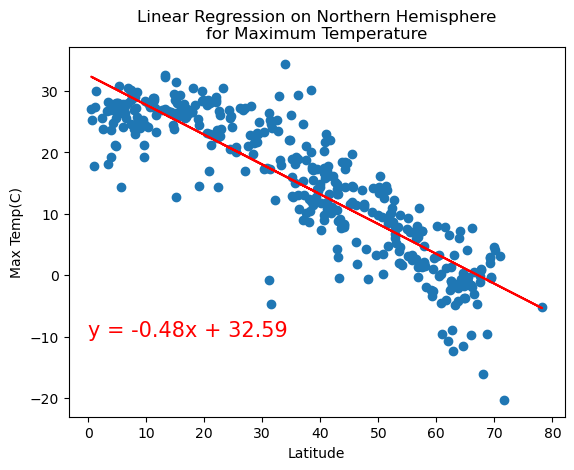

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\nfor Maximum Temperature', (0,-10))

# Save the figure
plt.savefig("output_data/Fig5.png")


The r-value is: 0.4905667375089528


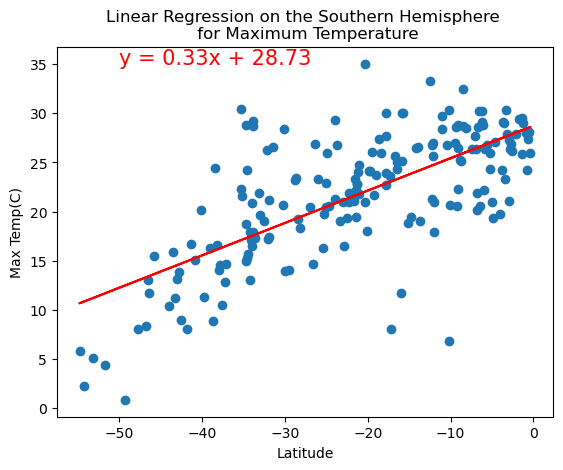

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', (-50,35))

# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002756059189366916


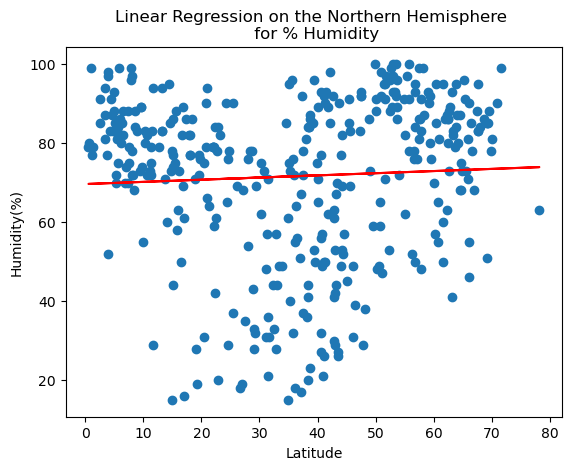

<Figure size 640x480 with 0 Axes>

In [18]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', (40,10))

# Save the figure
plt.savefig("output_data/Fig7.png")

The r-value is: 0.011702218154342425


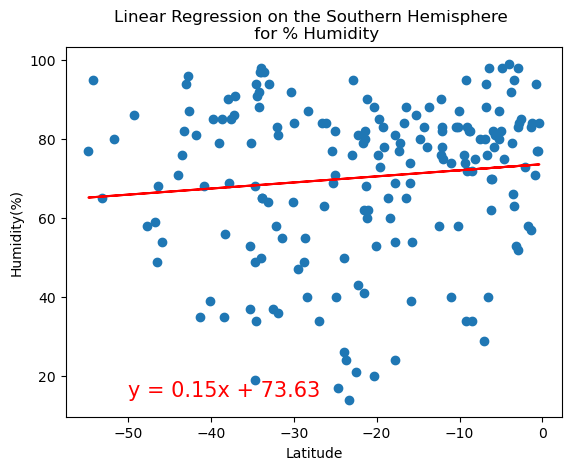

<Figure size 640x480 with 0 Axes>

In [19]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', (-50,15))

# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012155921978745753


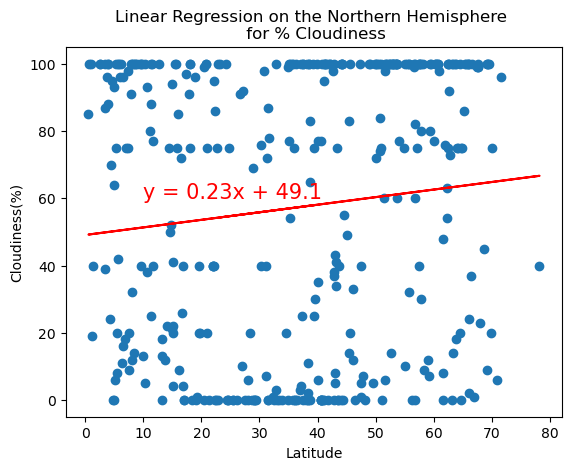

<Figure size 640x480 with 0 Axes>

In [20]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', (10,60))

# Save the figure
plt.savefig("output_data/Fig9.png")

The r-value is: 9.050310864422836e-06


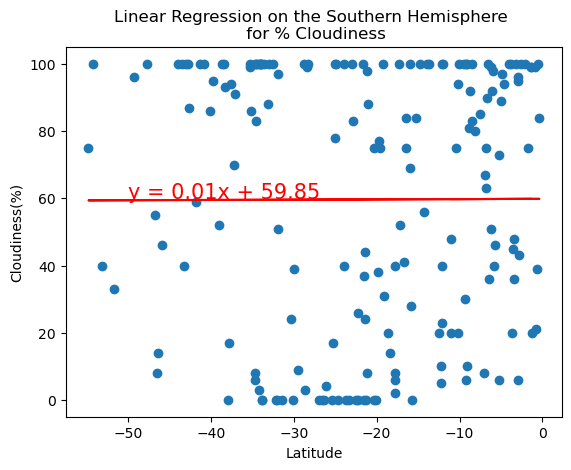

<Figure size 640x480 with 0 Axes>

In [21]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', (-50,60))

# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07410280699951896


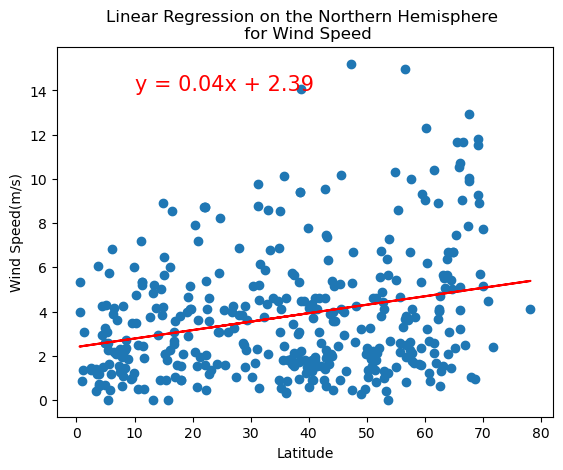

<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', (10,14))


# Save the figure
plt.savefig("output_data/Fig11.png")

The r-value is: 0.18044219631845113


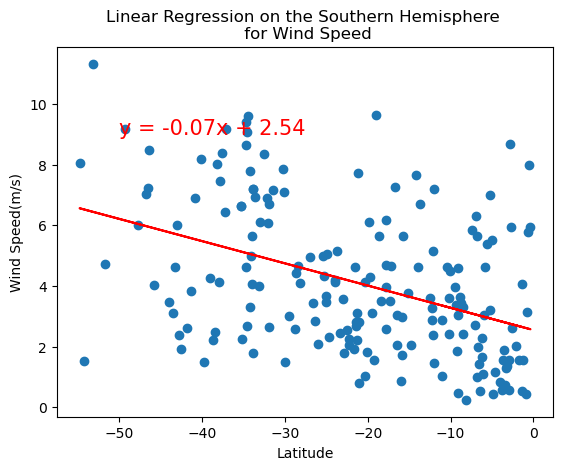

<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', (-50,9))

# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

To determine the linear relationships between the weather variables and latitude, linear regression analysis has been performed.
The linear regression equation is of the form y = mx + b, where y is the weather variable (e.g., temperature, humidity, cloudiness, wind speed), x is the latitude, m is the slope of the regression line, and b is the y-intercept. The analysis provides insights into how these weather variables change as we move away from the equator (latitude 0).

Here are the discussions about the linear relationships for each weather variable:

Temperature vs. Latitude:
For the Northern Hemisphere, there is a strong negative linear relationship between latitude and maximum temperature (Max Temp(C)). As you move farther from the equator (higher latitude), temperatures tend to decrease.

For the Southern Hemisphere, there is a positive linear relationship between latitude and maximum temperature. As you move closer to the equator (lower latitude), temperatures tend to increase.

Humidity vs. Latitude:
In both the Northern and Southern Hemispheres, there is no strong linear relationship between latitude and humidity. Humidity remains relatively consistent across different latitudes.

Cloudiness vs. Latitude:
In both the Northern and Southern Hemispheres, there is no strong linear relationship between latitude and cloudiness. Cloudiness levels vary widely at all latitudes.

Wind Speed vs. Latitude:
For the Northern Hemisphere, there is a very weak positive linear relationship between latitude and wind speed (m/s). As you move farther from the equator (higher latitude), wind speeds tend to slightly increase.

For the Southern Hemisphere, there is also a very weak positive linear relationship between latitude and wind speed. As you move closer to the equator (lower latitude), wind speeds tend to slightly increase.
Please note that in some cases, the r-value (correlation coefficient) is very close to zero, indicating a weak linear relationship. These results imply that latitude alone may not be a strong predictor of certain weather variables, and other factors may have a more significant impact.